# Preprocessing

### Data analysis - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlearner.preprocessing import DataAnalyst, FeatureDropper

%matplotlib inline

Load data in `base_preprocess` class

In [2]:
filename = "../../8_SVS/05_Repositorios/00_ProyectosBase/21_DatosCateg_Images/dataframe_dataset_TMMK_Class_Seeds-Craters-YarnSeed_v5.csv"
dataset = DataAnalyst.load_data(filename, sep=";")

In [3]:
dataset.data.head(5)

,Id,path_img,00_Class,01_Class,02_Class,03_Class,04_Class,shape_x,shape_y,Defecto,...,Particle & Holes' Area,Convex Hull Area,Image Area,Number of Holes,Orientation,Max Feret Diameter Orientation,% Area/Image Area,% Area/(Particle & Holes' Area),Ratio of Equivalent Ellipse Axes,Ratio of Equivalent Rect Sides
0,Defect_1243,dataset/TMMK/Seeds_Craters_YarnSeed_v5/2/Defec...,00_Class_02_Defect_1243.png,01_Class_02_Defect_1243.png,02_Class_02_Defect_1243.png,03_Class_02_Defect_1243.png,04_Class_02_Defect_1243.png,43.0,43.0,1,...,55.0,59.0,1849.0,0.0,98.431334,109.983107,2.974581,100.0,2.108600,1.269282
1,Defect_0498,dataset/TMMK/Seeds_Craters_YarnSeed_v5/3/Defec...,00_Class_03_Defect_0498.png,01_Class_03_Defect_0498.png,02_Class_03_Defect_0498.png,03_Class_03_Defect_0498.png,04_Class_03_Defect_0498.png,40.0,39.0,1,...,28.0,28.0,1560.0,0.0,32.741461,29.744881,1.794872,100.0,1.402183,1.000000
2,Defect_2367,dataset/TMMK/Seeds_Craters_YarnSeed_v5/2/Defec...,00_Class_02_Defect_2367.png,01_Class_02_Defect_2367.png,02_Class_02_Defect_2367.png,03_Class_02_Defect_2367.png,04_Class_02_Defect_2367.png,43.0,43.0,1,...,52.0,54.0,1849.0,0.0,155.847842,161.565051,2.812331,100.0,2.482671,2.042998
3,Defect_0562,dataset/TMMK/Seeds_Craters_YarnSeed_v5/3/Defec...,00_Class_03_Defect_0562.png,01_Class_03_Defect_0562.png,02_Class_03_Defect_0562.png,03_Class_03_Defect_0562.png,04_Class_03_Defect_0562.png,38.0,38.0,1,...,20.0,21.0,1444.0,0.0,25.631031,153.434949,1.385042,100.0,1.000000,1.000000
4,Defect_0573,dataset/TMMK/Seeds_Craters_YarnSeed_v5/2/Defec...,00_Class_02_Defect_0573.png,01_Class_02_Defect_0573.png,02_Class_02_Defect_0573.png,03_Class_02_Defect_0573.png,04_Class_02_Defect_0573.png,38.0,37.0,1,...,21.0,21.0,1406.0,0.0,93.490529,116.565051,1.493599,100.0,1.936640,1.000000


In [4]:
dataset.data = dataset.data.drop(["Defecto", "Id", "path_img", "00_Class", "01_Class", "02_Class",
                   "03_Class", "04_Class", 'shape_x', 'shape_y', 'path_csv'], axis=1)

In [5]:
dataset.data.nunique()

categoria                                   3
Elongation Factor                         780
Compactness Factor                        522
Heywood Circularity Factor               1947
Type Factor                              2511
Perimeter                                 771
Convex Hull Perimeter                     712
Holes' Perimeter                           11
Max Feret Diameter                        160
Equivalent Ellipse Major Axis            1974
Equivalent Ellipse Minor Axis            1975
Equivalent Ellipse Minor Axis (Feret)    1038
Hydraulic Radius                         1971
Waddel Disk Diameter                      169
Area                                      169
Holes' Area                                10
Particle & Holes' Area                    170
Convex Hull Area                          191
Image Area                                 66
Number of Holes                             4
Orientation                              2749
Max Feret Diameter Orientation    

In [6]:
dataset.categorical_vs_numerical()

Number of categorical features: 0
Number of numerical features: 26


([],
 ['categoria',
  'Elongation Factor',
  'Compactness Factor',
  'Heywood Circularity Factor',
  'Type Factor',
  'Perimeter',
  'Convex Hull Perimeter',
  "Holes' Perimeter",
  'Max Feret Diameter',
  'Equivalent Ellipse Major Axis',
  'Equivalent Ellipse Minor Axis',
  'Equivalent Ellipse Minor Axis (Feret)',
  'Hydraulic Radius',
  'Waddel Disk Diameter',
  'Area',
  "Holes' Area",
  "Particle & Holes' Area",
  'Convex Hull Area',
  'Image Area',
  'Number of Holes',
  'Orientation',
  'Max Feret Diameter Orientation',
  '% Area/Image Area',
  "% Area/(Particle & Holes' Area)",
  'Ratio of Equivalent Ellipse Axes',
  'Ratio of Equivalent Rect Sides'])

#### Categoria 2-3

In [7]:
from mlearner.preprocessing import ExtractCategories

ec = ExtractCategories([2, 3], target=["categoria"]).fit(dataset.data)
dataset.data = ec.transform(dataset.data)

dataset.Xy_dataset(target=["categoria"])

## Model training

We will implement the following models:

- **Linear Regression**: preprocessing is required and we will use `StandardScaler` (mean zero with unit variance);
- **XGBoost / LightGBM**: no preprocessing as decision trees are capable of handling features with different scales.

##### LightGBM

In [8]:
from mlearner.models import modelLightBoost

In [9]:
LGM = modelLightBoost()

In [10]:
LGM.fit(X=dataset.X, y=dataset.y)

Accurancy para el conjunto de entrenamiento ---> 99.77%
Accurancy para el conjunto de validacion ------> 90.14%


In [11]:
score, results = LGM.fit_cv(X=dataset.X, y=dataset.y)


Optimal Round: 0
Optimal Score: 0.901 + stdv:0.010


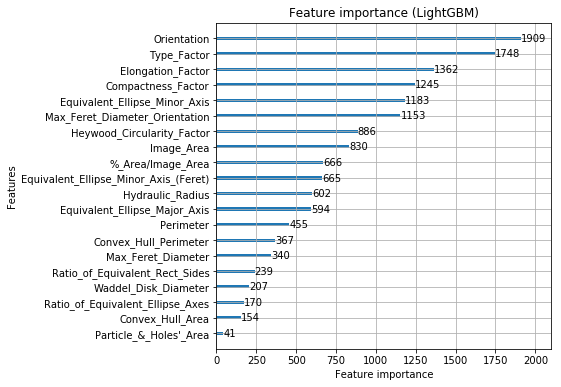

In [12]:
LGM.get_important_features(max_num_features=20)

In [29]:
LGM.save_model(direct="./checkpoints", name="model1_lgbm")
LGM.save_model(direct="./checkpoints", name="model1_lgbm", file_model=".pkl")

Modelo guardado en la ruta: ./checkpoints/model1_lgbm_20200425-203812.txt
Modelo guardado en la ruta: ./checkpoints/model1_lgbm_20200425-203812.pkl


##### XGBoost

In [72]:
from mlearner.models import modelXGBoost
import xgboost

In [15]:
XGB = modelXGBoost()

In [16]:
XGB.dataset(X=dataset.X, y=dataset.y)
XGB.y.unique()

array([0, 1], dtype=int64)

In [17]:
XGB.fit(X=dataset.X, y=dataset.y)

Accurancy para el conjunto de entrenamiento ---> 91.93%
Accurancy para el conjunto de validacion ------> 90.14%


In [18]:
score, results = XGB.fit_cv(X=dataset.X, y=dataset.y)


Optimal Round: 1
Optimal Score: 0.918 + std:0.014


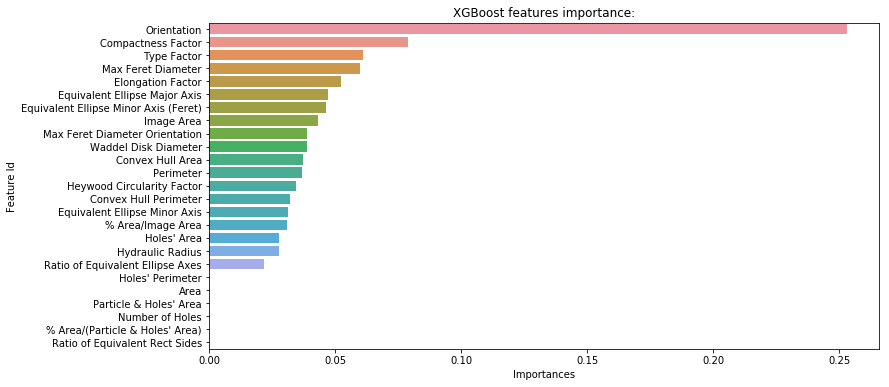

In [19]:
_ = XGB.get_important_features()

In [45]:
XGB.save_model(direct="./checkpoints", name="model2_xgb")
XGB.save_model(direct="./checkpoints", name="model2_xgb", file_model=".pkl")

Modelo guardado en la ruta: ./checkpoints/model2_xgb_20200425-205636.txt
Modelo guardado en la ruta: ./checkpoints/model2_xgb_20200425-205636.pkl


## Linear regression

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(dataset.X, dataset.y)

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import joblib

model_linreg = LinearRegression(fit_intercept=True)
model_linreg.fit(X_train_std, y_train)
print(np.sqrt(mean_squared_error(y_test, model_linreg.predict(X_valid_std))))
_ = joblib.dump(model_linreg, 'checkpoints/model3_linreg.pkl')

model_ridge = Ridge(alpha=4.0, fit_intercept=True, max_iter=1000, solver='saga')
model_ridge.fit(X_train_std, y_train)
print(np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_valid_std))))
_ = joblib.dump(model_ridge, 'checkpoints/model4_ridge.pkl');

model_lasso = Lasso(alpha=10.0, fit_intercept=True, max_iter=1000)
model_lasso.fit(X_train_std, y_train)
print(np.sqrt(mean_squared_error(y_test, model_lasso.predict(X_valid_std))))
_ = joblib.dump(model_lasso, 'checkpoints/model5_lasso.pkl')

0.47090354200719364
0.41358870556781274
0.42658036933559307


## Ensembling and test predictions

In [65]:
model_lgbm = joblib.load('checkpoints/model1_lgbm_20200425-203812.pkl')
model_xgb = joblib.load('checkpoints/model2_xgb_20200425-205636.pkl')
model_lreg = joblib.load('checkpoints/model3_linreg.pkl')
model_ridge = joblib.load('checkpoints/model4_ridge.pkl')
model_lasso = joblib.load('checkpoints/model5_lasso.pkl')
model_linreg = joblib.load('checkpoints/model3_linreg.pkl')

In [66]:
Y_valid_lgbm = model_lgbm.predict(X_test)
Y_valid_lreg = model_linreg.predict(X_valid_std)
X_valid_level2 = np.c_[Y_valid_lgbm, Y_valid_lreg]
X_valid_level2[:10,:]

array([[9.99688554e-01, 2.27363775e+00],
       [9.99997687e-01, 2.54997485e+00],
       [9.99954683e-01, 2.40695313e+00],
       [5.78364952e-03, 2.35414109e+00],
       [1.38449660e-07, 2.20274853e+00],
       [2.08482891e-06, 2.17357987e+00],
       [9.99994225e-01, 2.21949015e+00],
       [9.99992630e-01, 2.23595184e+00],
       [1.61368049e-03, 2.23009461e+00],
       [2.24768935e-04, 2.04366938e+00]])

## Stacking

In [67]:
y_train_level2 = y_train
X_train_level2 = np.zeros([y_train_level2.shape[0], 2])

In [68]:
lr_stack = LinearRegression().fit(X_train_level2, Y_train_level2)

In [69]:
train_preds = lr_stack.predict(X_train_level2)
rmse_train = np.sqrt(mean_squared_error(y_train_level2, train_preds))

valid_preds = lr_stack.predict(X_valid_level2)
rmse_valid = np.sqrt(mean_squared_error(y_test, valid_preds))

print('RMSE Train: %f' % rmse_train)
print('RMSE Test : %f' % rmse_valid)

RMSE Train: 0.407979
RMSE Test : 0.426580


##  test predictions

In [83]:
Y_test_lgbm = model_lgbm.predict(X_test).clip(0, 20)
Y_test_xgbm = model_xgb.predict(xgboost.DMatrix(X_test)).clip(0, 20)
Y_test_lreg = model_linreg.predict(X_test).clip(0, 20)
Y_test_ridge = model_ridge.predict(X_test).clip(0, 20)
Y_test_lasso = model_lasso.predict(X_test).clip(0, 20)